In [2]:
# Cell 1: Importing necessary libraries
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
# from hyperopt import hp, tpe, Trials, fmin, space_eval
# from vowpalwabbit.sklearn_vw import VWClassifier


In [3]:
# Cell 2: Loading the dataset
df = pd.read_csv("ceas.csv", dtype=str)


In [4]:
# Cell 3: Dropping rows with null values and converting columns to strings
df.dropna(subset=['sender', 'receiver', 'date', 'subject', 'body'], inplace=True)
df = df.astype(str)


In [5]:
# Cell 5: Removing rows where 'urls' or 'labels' columns contain values other than 0 or 1
df = df[(df['urls'].isin(['0', '1'])) & (df['label'].isin(['0', '1']))]


In [6]:
# Cell 6: Converting 'urls' and 'labels' columns to integers
df['urls'] = df['urls'].astype(int)
df['label'] = df['label'].astype(int)


In [7]:
# Cell 7: Resetting the index after dropping rows
df.reset_index(drop=True, inplace=True)


In [8]:
# Cell 8: Defining patterns to extract email parts
email_pattern = re.compile(r"Email> \((.*?)\)")
date_pattern = re.compile(r"Date> (.*?)$")
subject_pattern = re.compile(r"Subject> (.*)$")
body_pattern = re.compile(r"([\s\S]*)")


In [9]:
# Define the pattern for the sender value
pattern = r'^[\w\s]+ <[\w.-]+@[\w.-]+>$'

# Filter the DataFrame based on the pattern
df = df[df['sender'].str.match(pattern)]

# Drop columns with the name "Unnamed" and any NaN values
df = df.dropna(axis=1, how='all')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

# Reset the index after dropping columns
df.reset_index(drop=True, inplace=True)

# Display the DataFrame
print(df)

# Save the filtered dataset
df.to_csv("filtered_ceas.csv", index=False)



                                                  sender  \
0                       Young Esposito <Young@iworld.de>   
1      Daily Top 10 <Karmandeep-opengevl@universalnet...   
2                     Michael Parker <ivqrnai@pobox.com>   
3      Gretchen Suggs <externalsep1@loanofficertool.com>   
4      Caroline Aragon <dwthaidomainnamesm@thaidomain...   
...                                                  ...   
31437    CNN Alerts <charlene-detecton@btcmarketing.com>   
31438           CNN Alerts <idgetily1971@careplusnj.org>   
31439                   Abhijit Vyas <xpojhbz@gmail.com>   
31440              Joseph Brennan <vupzesm@columbia.edu>   
31441                Christian Heimes <wluhe@cheimes.de>   

                                             receiver  \
0                         user4@gvc.ceas-challenge.cc   
1                       user2.9@gvc.ceas-challenge.cc   
2      SpamAssassin Dev <xrh@spamassassin.apache.org>   
3                       user2.2@gvc.ceas-challenge.

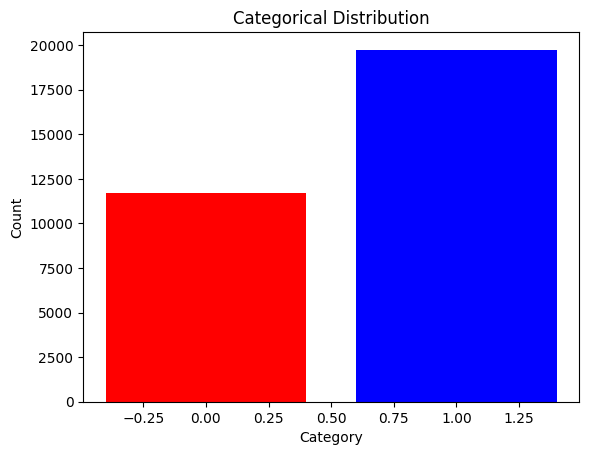

In [12]:

index = df['label'].value_counts().index
values = df['label'].value_counts().values
plt.bar(index,values,color=['blue','red'])
plt.title("Categorical Distribution")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()